## Get bounding boxes from parking lot images using YOLOv8n

In [36]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')  # load a pretrained YOLOv8n model

### Load image data summary

In [37]:
#Load file_names_dataframe from CSV
import pandas as pd
df = pd.read_csv('file_names_dataframe.csv')
display(df.head())

,parking_lot,weather,date,file_path
0,UFPR04,Cloudy,2012-12-29,/Volumes/SSD_1/parking-lot/PKLotYoloData/NoXML...
1,UFPR04,Cloudy,2012-12-29,/Volumes/SSD_1/parking-lot/PKLotYoloData/NoXML...
2,UFPR04,Cloudy,2012-12-29,/Volumes/SSD_1/parking-lot/PKLotYoloData/NoXML...
3,UFPR04,Cloudy,2012-12-29,/Volumes/SSD_1/parking-lot/PKLotYoloData/NoXML...
4,UFPR04,Cloudy,2012-12-29,/Volumes/SSD_1/parking-lot/PKLotYoloData/NoXML...


## Visualize different locations

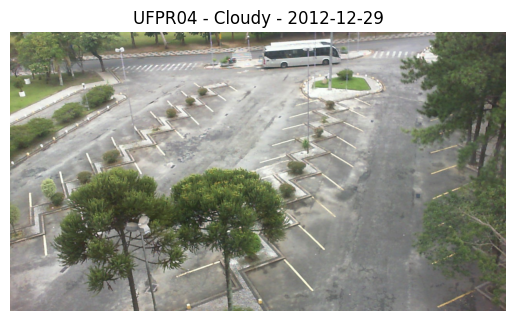

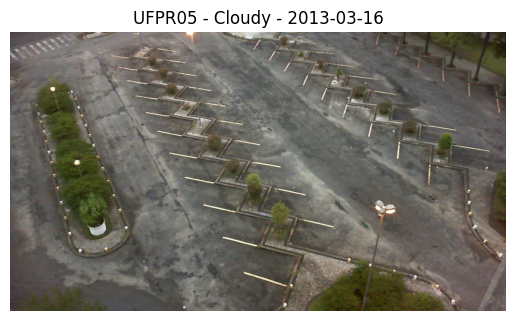

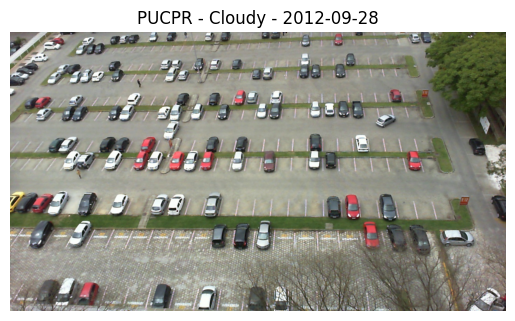

In [17]:
from PIL import Image

# Print one image from each unique parking_lot in the dataframe
import matplotlib.pyplot as plt

for lot in df['parking_lot'].unique():
    row = df[df['parking_lot'] == lot].iloc[0]
    image_path = row['file_path']
    img = Image.open(image_path)
    plt.figure()
    plt.title(f"{lot} - {row['weather']} - {row['date']}")
    plt.imshow(img)
    plt.axis('off')
    plt.show()

### Sample YOLO inference on one image


image 1/1 /Volumes/SSD_1/parking-lot/PKLotYoloData/NoXML/UFPR04/Cloudy/2012-12-29/2012-12-29_11_35_34.jpg: 384x640 1 car, 38.0ms
Speed: 1.7ms preprocess, 38.0ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
image 1/1 /Volumes/SSD_1/parking-lot/PKLotYoloData/NoXML/UFPR04/Cloudy/2012-12-29/2012-12-29_11_35_34.jpg: 384x640 1 car, 38.0ms
Speed: 1.7ms preprocess, 38.0ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


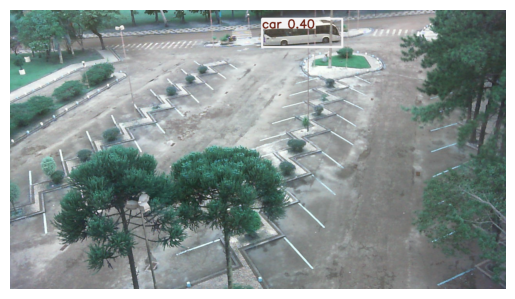

In [16]:
# Display the image with bounding boxes in the notebook cell output
from PIL import Image
import matplotlib.pyplot as plt

if not df.empty:
    first_image_path = df.iloc[0]['file_path']
    result = model(first_image_path)[0] #YOLO returns a list even with one image
    img_with_boxes = result.plot()

    # Display the image using matplotlib
    plt.imshow(img_with_boxes)
    plt.axis('off')
    plt.show()

In [27]:
# Process all images from the "UFPR05" location, save bounding box centers, and plot them
import matplotlib.pyplot as plt

# Filter the DataFrame for the "UFPR05" location
ufpr05_images = df[df['parking_lot'] == 'UFPR05']
print(f"Number of images: {len(ufpr05_images)}")

Number of images: 1924


In [30]:
# Initialize a list to store the center coordinates of bounding boxes
bounding_box_centers = []

# Iterate through each image in the "UFPR05" location
for _, row in ufpr05_images.iterrows():
    image_path = row['file_path']
    #print(f"Processing image: {image_path}")

    # Run the image through the YOLO model
    results = model(image_path, verbose=False)

    # Access the first result
    result = results[0]

    # Extract bounding box centers
    boxes = result.boxes  # Get the bounding boxes
    if boxes is not None:
        for box in boxes.xywh:  # xywh format: (center_x, center_y, width, height)
            center_x, center_y = box[:2]  # Extract center coordinates
            bounding_box_centers.append((center_x.item(), center_y.item()))


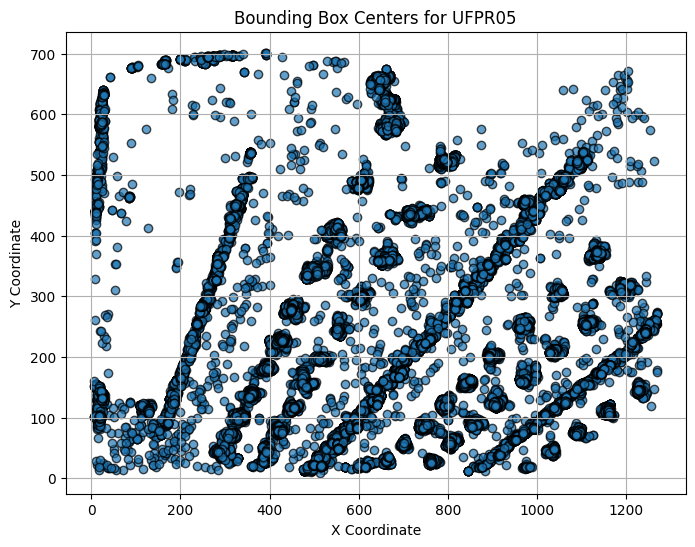

In [31]:
# Convert the list of centers to a scatter plot
if bounding_box_centers:
    x_coords, y_coords = zip(*bounding_box_centers)
    plt.figure(figsize=(8, 6))
    plt.scatter(x_coords, y_coords, alpha=0.7, edgecolors='k')
    plt.title("Bounding Box Centers for UFPR05")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)
    plt.show()
else:
    print("No bounding boxes found for UFPR05 images.")

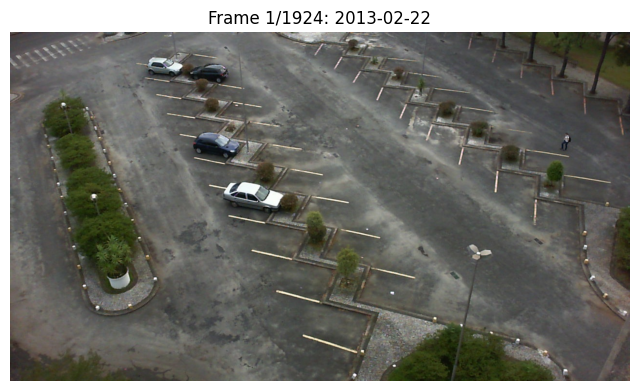

In [33]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from PIL import Image

# Filter the DataFrame for the "UFPR05" location
ufpr05_images = df[df['parking_lot'] == 'UFPR05']

# Sort images by date and time for proper sequencing
ufpr05_images = ufpr05_images.sort_values(by='date')

# Create a figure for the animation
fig, ax = plt.subplots(figsize=(8, 6))

# Initialize the image display
img_display = ax.imshow(Image.open(ufpr05_images.iloc[0]['file_path']))
ax.axis('off')  # Turn off axes for better visualization

# Update function for the animation
def update(frame):
    image_path = ufpr05_images.iloc[frame]['file_path']
    img = Image.open(image_path)
    img_display.set_data(img)
    ax.set_title(f"Frame {frame + 1}/{len(ufpr05_images)}: {ufpr05_images.iloc[frame]['date']}")
    return img_display,

# Create the animation
ani = FuncAnimation(
    fig, update, frames=len(ufpr05_images), interval=500, blit=True
)

In [34]:
# Save the animation as a GIF or MP4 (optional)
#ani.save('ufpr05_animation.gif', writer='pillow', fps=20)  # Save as GIF
ani.save('ufpr05_animation.mp4', writer='ffmpeg', fps=20)  # Save as MP4